<a href="https://colab.research.google.com/github/alchemistklk/pytorch_tutorial/blob/master/03_pytorch_computer_version_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Version

## 0.Computer version libraries in PyTorch

- `torchversion`- base domain library for PyTorch computer version
- `torchversion.datasets` - get datasets and data loading function for PyTorch computer version
- `torchversion.model` - get pretrained computer version model that you can leverage for you own problems
- `torchversion.transform` - function to manupulating your version data(images) to be suitable for use with an ML model
- `torch.utils.data.Dataset` - Base dataset for PyTorch
- `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchversion
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## 1.Getting a dataset
The dataset we'll be using is FashionMINIST from `torchversion.datasets`

In [ ]:
train_data = datasets.FashionMNIST(
    root="data", # where to download the data to?
    train=True, # do we want to the traing data?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transfrom lables/targets?
    )

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14870181.67it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 246407.99it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:05<00:00, 883579.35it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23019485.07it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### 1.1 Check input and output shapes of data


In [ ]:
class_names = train_data.classes

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

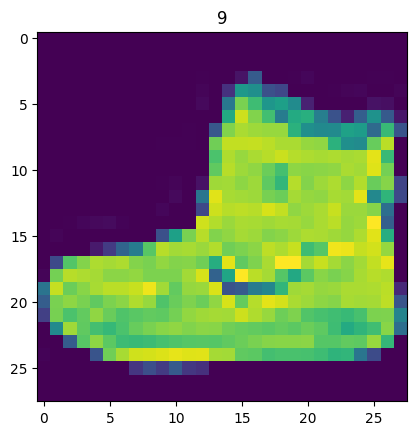

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

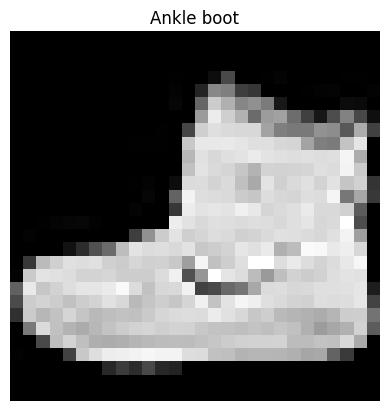

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

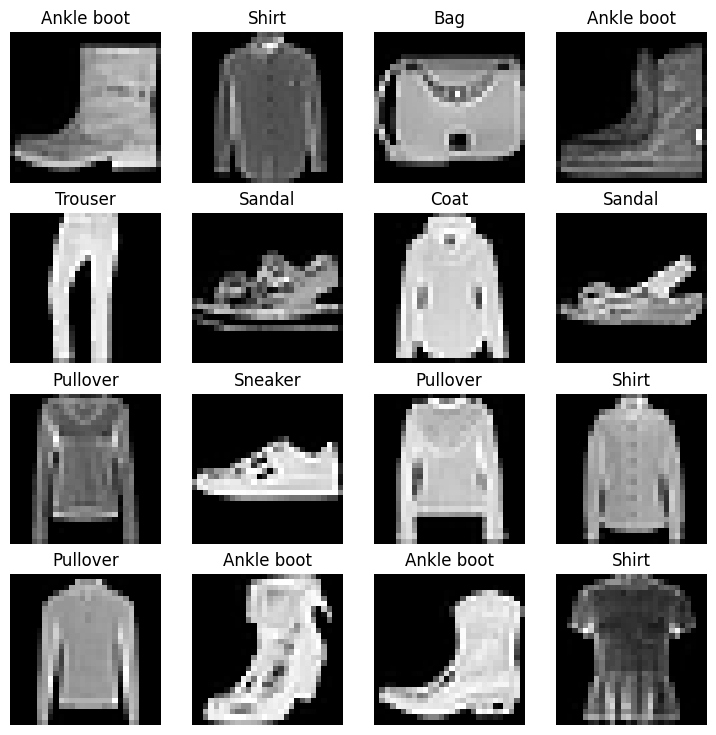

In [ ]:
# Plot mode images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4 ,4
for i in range(1, rows * cols + 1):
  # convert tensor to index
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2.Prepare DataLoader
Right now, our data is in format of PyTorch Datasets
DataLoader turns our dataset into a PyTorch iterable.

More specifically, we want to turn our data into batches(or mini-batches)

Why would we do this?

1.It is more computationally efficient

2.It gives our neural network more chances to update its gradients per epochs


In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32
# Turn datasets into iterable(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, lable size:torch.Size([])


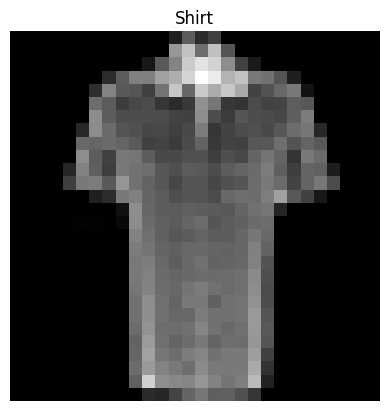

In [ ]:
MANUAL_SEED = 42
torch.manual_seed(MANUAL_SEED)
torch.cuda.manual_seed(MANUAL_SEED)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, lable size:{label.shape  }")

## 3. Model 0: Build a baseline model


In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()
# Get a single sample
x = train_features_batch[0]
# Flatten the sample
output = flatten_model(x)
# print out what happened
print(f"Shape before flattening:{x.shape}")
print(f"Shape before flattening:{output.shape}")

Shape before flattening:torch.Size([1, 28, 28])
Shape before flattening:torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_features, hidden_units, output_features):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Flatten(), # flatten
        nn.Linear(in_features=input_features, out_features=hidden_units), # learnable parameters
        nn.Linear(in_features=hidden_units, out_features=output_features) # learnable parameters
    )

  def forward(self, x):
    return self.linear_stack(x)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model_0 = FashionMNISTModelV0(input_features=784, hidden_units=10, output_features=len(class_names)).to(device)
model_0.state_dict()

OrderedDict([('linear_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]],
                     device='cuda:0')),
             ('linear_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069], device='cuda:0')),
             ('linear_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
logits = model_0(dummy_x.to(device))
prob = torch.softmax(logits, dim=1).argmax(dim=1)
logits, prob


(tensor([[ 0.3041,  0.0994, -0.2225,  0.0223,  0.0929,  0.3192,  0.4622, -0.4053,
          -0.1659, -0.0464]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([6], device='cuda:0'))

## 3.1 Setup loss, optimizer, and evaluation metrics
- Loss function - since we're working with multi-classification, our loss function will be `nn.CrossEntropyLoss()`
- Optimizer: our optimizer `torch.optim.SGD()`
- Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric


In [ ]:
!pip -q install torchmetrics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01, momentum=0.9)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

### 3.2 Creatign a function to time our experiments

In [ ]:
from timeit import default_timer as timer

def print_train_time(start, end, device: torch.device):
  total_time = end - start
  print(f"Train time on {device}, {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start_time, end_time, device="cpu")

Train time on cpu, 0.000 seconds


5.502700003034988e-05

### 3.3 Create a training and testing loop on batches of data

In [ ]:
from tqdm.auto import tqdm
epochs = 3
start_time = timer()
for epoch in tqdm(range(epochs)):
  train_loss = 0
  train_acc = 0
  print(f"Epoch: {epoch}\n========")
  for batch,(X, y) in enumerate(train_dataloader):
    ### Train
    model_0.train()

    X = X.to(device)
    y = y.to(device)

    # 1.Forward pass
    y_logits = model_0(X)
    # 2. Calculate the loss
    loss = loss_fn(y_logits, y)
    train_loss += loss
    # 3. zero grad
    optimizer.zero_grad()
    # 4. loss backward
    loss.backward()
    # 5. step
    optimizer.step()

    if batch % 400 == 0:
      print(f"Look at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)

  test_loss = 0
  test_acc = 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1.forward pass
      X = X.to(device)
      y = y.to(device)
      y_logits = model_0(X)
      loss = loss_fn(y_logits, y)
      # 2.calculate the loss
      test_loss += loss
      test_acc += accuracy_fn(y_logits.argmax(dim=1), y)

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"\n Train loss:{train_loss:.5f} | Test loss:{test_loss:.5f}, Test acc:{test_acc:.2f}\n")

end_time = timer()

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Look at 0 / 60000 samples
Look at 12800 / 60000 samples
Look at 25600 / 60000 samples
Look at 38400 / 60000 samples
Look at 51200 / 60000 samples

 Train loss:0.44775 | Test loss:0.47005, Test acc:0.83

Epoch: 1
Look at 0 / 60000 samples
Look at 12800 / 60000 samples
Look at 25600 / 60000 samples
Look at 38400 / 60000 samples
Look at 51200 / 60000 samples

 Train loss:0.43565 | Test loss:0.46623, Test acc:0.84

Epoch: 2
Look at 0 / 60000 samples
Look at 12800 / 60000 samples
Look at 25600 / 60000 samples
Look at 38400 / 60000 samples
Look at 51200 / 60000 samples

 Train loss:0.42963 | Test loss:0.49457, Test acc:0.82

Train time on cuda:0, 31.558 seconds


In [ ]:
total_train_model_time_0 = print_train_time(start_time, end_time, str(next(model_0.parameters()).device))

Train time on cuda:0, 48.293 seconds


## 4.Make predictions and get Model 0 result


In [ ]:
torch.manual_seed(MANUAL_SEED)

def eval_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
  """Returns a dictionary containing results of model predicting on data_loader

  Args:
    model(torch.nn.Module): A PyTorch model capable of predicting on data_loader
    data_loader(torch.utils.data.DataLoader): The target dataset to predict on
    loss_fn(torch.nn.Module): The loss function of model
    accuracy_fn: An accuracy function to compare model's prediction to true labels

  Returns:
    (dict): Results of model making predictions on data_loader
  """
  model.eval()
  loss = 0
  acc = 0
  with torch.inference_mode():
    for X, y in data_loader:
      X = X.to(device)
      y = y.to(device)
      test_logits = model(X)
      loss += loss_fn(test_logits, y)
      acc += accuracy_fn(test_logits.argmax(dim=1), y)

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
model_0_results = eval_mode(model_0, test_dataloader, loss_fn, accuracy_fn, device)

## 5.Setup device agnostic-code(for using GPU if there is one)

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from timeit import default_timer as timer
device = "cuda" if torch.cuda.is_available() else "cpu"

## 6.Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=20, output_shape=10).to(device)
model_1.state_dict()


OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0084,  0.0328, -0.0078,  ...,  0.0135, -0.0188, -0.0354],
                      [ 0.0187,  0.0085, -0.0182,  ...,  0.0115, -0.0008,  0.0017],
                      [ 0.0045,  0.0133, -0.0108,  ...,  0.0059,  0.0100,  0.0273],
                      ...,
                      [ 0.0170,  0.0106,  0.0352,  ..., -0.0152, -0.0014,  0.0008],
                      [-0.0198, -0.0133, -0.0142,  ..., -0.0313,  0.0080, -0.0075],
                      [ 0.0190,  0.0320, -0.0128,  ..., -0.0176, -0.0007,  0.0044]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0010,  0.0270, -0.0205,  0.0162,  0.0329, -0.0257, -0.0280,  0.0121,
                      -0.0127, -0.0008, -0.0333,  0.0218, -0.0024,  0.0022, -0.0124,  0.0124,
                      -0.0006, -0.0142,  0.0089, -0.0133], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.0830, -0.2142, -0.0865, 

### 6.1 Setup loss and accuracy function

In [ ]:
from torchmetrics import Accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01, momentum=0.9)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

def print_train_time(start, end, device: torch.device):
  total_time = end - start
  print(f"Train time on {device}, {total_time:.3f} seconds")
  return total_time

### 6.2 Functionizing training and test loops

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss = 0
  train_acc = 0

  model.to(device)
  for X, y in data_loader:
    X = X.to(device)
    y = y.to(device)
    y_logits = model(X)

    loss = loss_fn(y_logits, y)
    train_loss += loss
    train_acc += accuracy_fn(y_logits.argmax(dim=1), y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train Acc:{train_acc:.2f}")


def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device
              ):
  model.to(device)
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for X, y in data_loader:
      X = X.to(device)
      y = y.to(device)

      test_logits = model(X)

      test_loss += loss_fn(test_logits, y)
      test_acc += accuracy_fn(test_logits.argmax(dim=1), y)

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}")

In [ ]:
torch.manual_seed(42)

epochs = 3
start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epochs:{epoch}\n============")

  train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn)

  test_step(model_1, test_dataloader, loss_fn, accuracy_fn)

end_time = timer()

total_train_model_time_1 = print_train_time(start_time, end_time, device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epochs:0
Train loss: 0.59057 | Train Acc:0.79
Test loss:0.46598 | Test acc:0.83
Epochs:1
Train loss: 0.43812 | Train Acc:0.84
Test loss:0.42979 | Test acc:0.85
Epochs:2
Train loss: 0.40676 | Train Acc:0.86
Test loss:0.45734 | Test acc:0.83
Train time on cuda, 37.512 seconds


In [ ]:
model_1_results = eval_mode(model_1, test_dataloader, loss_fn, accuracy_fn)

## 7.Model2: Building a Convolutional Neural Network

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from timeit import default_timer as timer
class FashionMINISTModelV2(nn.Module):
  def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # how big is the square that's going to over the image?
                  stride=1, # default
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units,3,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units,hidden_units,3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )
  def forward(self, x):
    x = self.block1(x)
    x = self.block2(x)
    return self.classifier(x)

MANUAL_SEED = 42
torch.manual_seed(MANUAL_SEED)
device = "cuda" if torch.cuda.is_available() else "cpu"
model2 = FashionMINISTModelV2(input_shape=1, hidden_units=10, output_shape=10).to(device)

### 7.2 Setup loss and optimizer function


In [ ]:
loss_fn = nn.CrossEntropyLoss()
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)

In [ ]:
torch.manual_seed(42)
start_time = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  train_step(model2, train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
  test_step(model2, test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

end_time = timer()
total_train_model_time_2 = print_train_time(start_time, end_time, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.61353 | Train Acc:0.78
Test loss:0.41722 | Test acc:0.85
Train loss: 0.36861 | Train Acc:0.87
Test loss:0.36356 | Test acc:0.87
Train loss: 0.32153 | Train Acc:0.88
Test loss:0.34064 | Test acc:0.88
Train time on cuda, 48.293 seconds


In [ ]:
# get model_2 result
model_2_results = eval_mode(model2, test_dataloader, loss_fn, accuracy_fn)

## 8.Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.494567,"tensor(0.8228, device='cuda:0')"
1,FashionMNISTModelV1,0.457337,"tensor(0.8337, device='cuda:0')"
2,FashionMINISTModelV2,0.340644,"tensor(0.8789, device='cuda:0')"


In [ ]:
# Add traning time to result comparison
compare_results["training_time"] = [total_train_model_time_0, total_train_model_time_1, total_train_model_time_2]

In [ ]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.494567,"tensor(0.8228, device='cuda:0')",48.293302
1,FashionMNISTModelV1,0.457337,"tensor(0.8337, device='cuda:0')",37.511719
2,FashionMINISTModelV2,0.340644,"tensor(0.8789, device='cuda:0')",48.293302


### 8.1 Performace-tradeoff

In [ ]:
import numpy as np
model_acc = np.array(compare_results['model_acc'])
compare_results['model_acc'] = torch.tensor([x.item() for x in model_acc], dtype=torch.float32)


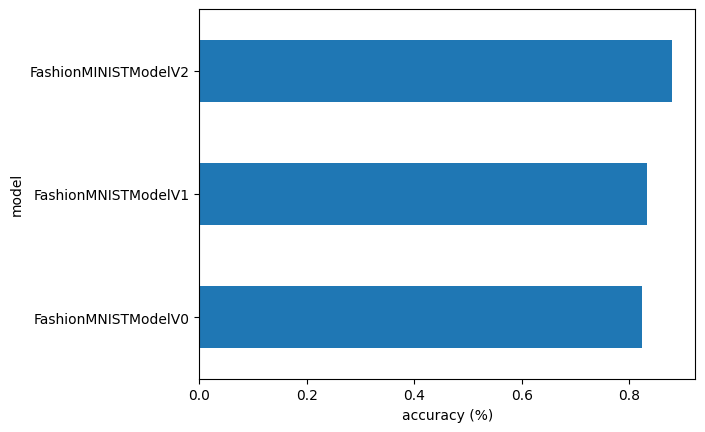

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # add batch size dimension
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs = torch.softmax(pred_probs, dim=1).argmax(dim=1)
pred_probs[:2]


tensor([5, 1])

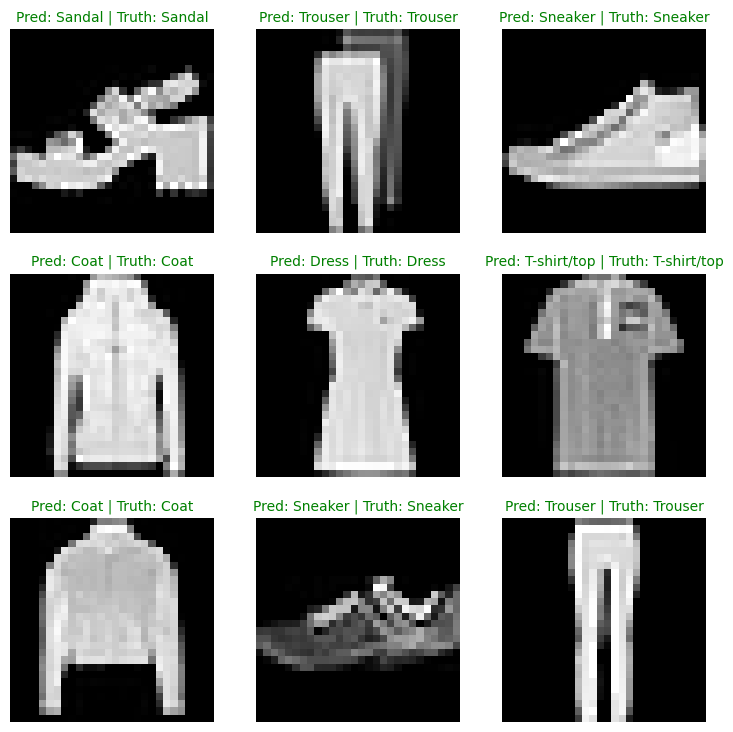

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label
  pred_label = class_names[pred_probs[i]]

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality
  if pred_label == truth_label:
    color = "green"
  else:
    color = "red"

  # Change the color of the title text
  plt.title(title_text, fontsize=10, color=color)
  plt.axis(False)

## 10.Making a confusion matrix for further prediction evaluation

In [ ]:
from tqdm.auto import tqdm
y_preds = []
model2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    y_logit = model2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred)
y_pred_tensor = torch.cat(y_preds)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"

except:
  %pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


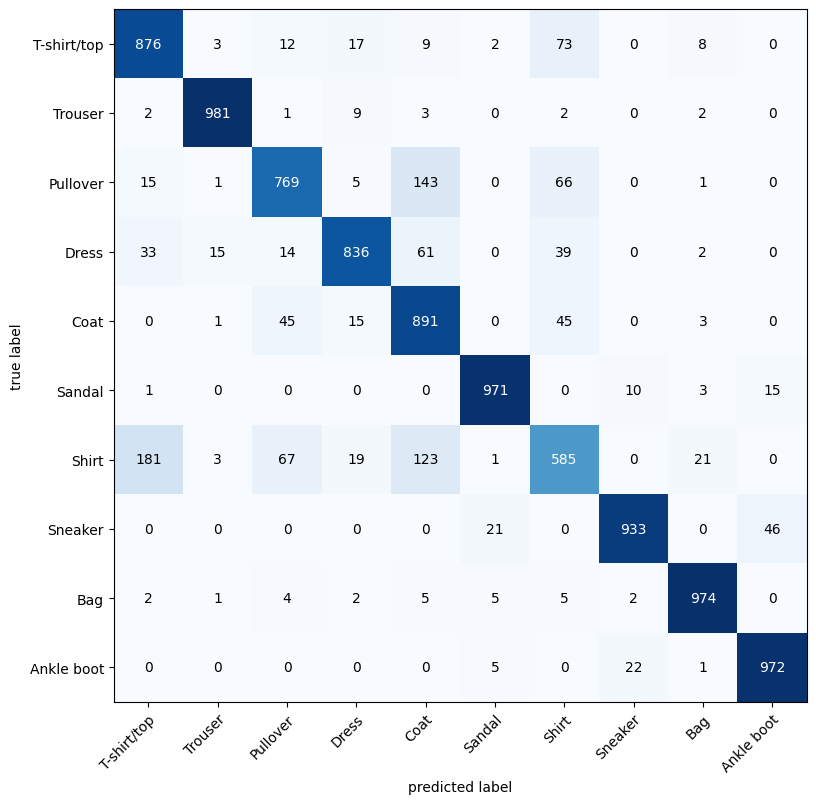

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion matrix instance and compare predictions targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor.cpu(), target=test_data.targets.cpu())

# 3.Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(9, 9)
)

## 11. Save and load best preforming model

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03_pytorch_computer_version_model_2.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict()
print(f"Save the model to {MODEL_SAVE_PATH}")

torch.save(model2.state_dict(), f=MODEL_SAVE_PATH)

Save the model to models/03_pytorch_computer_version_model_2.pth


In [ ]:
loaded_model_2 = FashionMINISTModelV2(input_shape=1,
                     hidden_units=10,
                     output_shape=10)
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_mode(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_resultss

{'model_name': 'FashionMINISTModelV2',
 'model_loss': 0.34064412117004395,
 'model_acc': tensor(0.8789, device='cuda:0')}

In [ ]:
# Check to see if results are close to each other
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)